<a href="https://colab.research.google.com/github/atopatalos/Repository_Project_dibimbing/blob/main/PR_day13_Patalo_Paul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Details
1. Data used : house price california
2. Name : Patalo

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Model ML Regresi
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

#Evaluation Regresi -> tambahkan matrix yang lain jika dibutuhkan
from sklearn.metrics import mean_squared_error


#import model classification
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #SVM
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.neighbors import KNeighborsClassifier #KNN
#import for metrics evaluasi klasifikasi
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

### 1. **ETL (Extract Load) Datasets**

In [ ]:
# california_dataset : Regresi

df = pd.read_csv('/content/house_price.csv')


In [ ]:
# Get the amount of row and features/columns
df.shape

(1460, 81)

### 2.**Data Understanding**


In [ ]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# List the features of dataset
df_numerical_features_list = list(df.select_dtypes(include=['int64', 'float64']))
df_numerical_features_list

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
# List the features of dataset
df_object_features_list = list(df.select_dtypes(include=['object']))
df_object_features_list

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
# Count features of type 'object'
df_numerical_features_count = df.select_dtypes(include=['int64', 'float64']).shape[1]

# Count features of type 'object'
df_object_features_count = df.select_dtypes(include=['object']).shape[1]

print("Amountof object features:", df_object_features_count)

print("Amount of numerical features:", df_numerical_features_count)

Amountof object features: 43
Amount of numerical features: 38


Findings:


1.   In General the datasets contains 79 features from 'MSSubclass' up to 'SalePrice'. Excluding the Id (which is usually identificaiton of each house).
Most of the features are typical property features which would determine the sale price of the house.
2.   There are 1460 rows, each rows probably represents a property/house.
3.   The following features have NaN values. Which also indicates not all the houses have common features.


*   LotFrontage
*   Alley
*   MasVnrType
*   MasVnrArea
*   Electrical
*   FireplaceQu
*   GarageType
*   GarageYrBlt
*   GarageFinish
*   GarageQual
*   GarageCond
*   BsmtQual
*   BsmtCond
*   BsmtExposure
*   BsmtFinType1
*   PoolQC
*   Fence
*   MiscFeature







### 3. **EDA (Exploration Data Analysis)**

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Get numerical features of dataset
df_numerical_features = df.select_dtypes(include=['int64', 'float64'])
df_numerical_features


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
# Get object/categorical features of dataset
df_object_features = df.select_dtypes(include=['object'])
df_object_features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# List the features of dataset
df_object_features_list = list(df.select_dtypes(include=['object']))
df_object_features_list



['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### 4 **Feature Egnineering**
**4.1 Categorical Data/Object**

In [ ]:
# Display unique values for each column
for column in df.select_dtypes(include=['object']):
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: [nan 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['Vi

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_object_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                         'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                         'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                         'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                         'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                         'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                         'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                         'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                         'SaleCondition']


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate to apply label encoder
for feature in df_object_features:
    # Fill missing values with a placeholder (you might want to handle missing values differently)
    df[feature].fillna("NA", inplace=True)

    # Fit and transform the data using label encoding
    df[feature] = label_encoder.fit_transform(df[feature])

In [ ]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,1,0,3,0,...,0,3,2,3,700,10,2009,8,4,143000
6,7,20,3,75.0,10084,1,1,3,3,0,...,0,3,4,1,0,8,2007,8,4,307000
7,8,60,3,NaN,10382,1,1,0,3,0,...,0,3,4,3,350,11,2009,8,4,200000
8,9,50,4,51.0,6120,1,1,3,3,0,...,0,3,4,1,0,4,2008,8,0,129900
9,10,190,3,50.0,7420,1,1,3,3,0,...,0,3,4,1,0,1,2008,8,4,118000


In [ ]:
df.shape


(1460, 81)

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**4.2 Handle Duplicate Data**

In [ ]:
# Drop Duplicates
print(f"Dataframe dimension before duplication drop {df.shape[0]}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Dataframe dimension after duplication drop {df.shape[0]}")

Dataframe dimension before duplication drop 1460
Dataframe dimension after duplication drop 1460


In [ ]:
df.shape

(1460, 81)

**4.3 Feature Scaling**

In [ ]:
# Check the feature in the form of list
df_feature_list = list(df.columns)
df_feature_list

In [ ]:
# List the features of dataset round-2
df_numerical_features_list_2 = list(df.select_dtypes(include=['int64', 'float64']))
df_numerical_features_list_2

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [ ]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,1,0,3,0,...,0,3,2,3,700,10,2009,8,4,143000
6,7,20,3,75.0,10084,1,1,3,3,0,...,0,3,4,1,0,8,2007,8,4,307000
7,8,60,3,NaN,10382,1,1,0,3,0,...,0,3,4,3,350,11,2009,8,4,200000
8,9,50,4,51.0,6120,1,1,3,3,0,...,0,3,4,1,0,4,2008,8,0,129900
9,10,190,3,50.0,7420,1,1,3,3,0,...,0,3,4,1,0,1,2008,8,4,118000


In [ ]:
# Split the original dataset into X which exclude feature 'SalePrice'
X = df.drop('SalePrice', axis=1).values
y = df['SalePrice'].values

In [ ]:
# Feature Scalling
# Transform into normal distribusi (mean = 0, standar deviation = 1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
numerical_features = ['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

new_df = pd.DataFrame(data = X_std, columns = numerical_features)
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730865,0.073375,-0.045532,-0.208034,-0.207142,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-1.728492,-0.872563,-0.045532,0.409895,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,-1.726120,0.073375,-0.045532,-0.084449,0.073480,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502
3,-1.723747,0.309859,-0.045532,-0.414011,-0.096897,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,-1.721374,0.073375,-0.045532,0.574676,0.375148,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,2.100892,0.138777,0.313867,0.208502


In [ ]:
# Check for 'NaN' values in each feature
nan_values = new_df.isna().any()

features_with_nan = nan_values[nan_values].index
if len(features_with_nan) > 0:
    print(f"Features with 'NaN' values: {features_with_nan}")
else:
    print("No 'NaN' values in the specified features.")

Features with 'NaN' values: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   float64
 6   Alley          1460 non-null   float64
 7   LotShape       1460 non-null   float64
 8   LandContour    1460 non-null   float64
 9   Utilities      1460 non-null   float64
 10  LotConfig      1460 non-null   float64
 11  LandSlope      1460 non-null   float64
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   float64
 14  Condition2     1460 non-null   float64
 15  BldgType       1460 non-null   float64
 16  HouseStyle     1460 non-null   float64
 17  OverallQual    1460 non-null   float64
 18  OverallC

In [ ]:
check_features_nan = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

for feature in check_features_nan :
    unique_values = new_df[feature].unique()
    print(f"Unique values in {feature}:\n{unique_values}\n")

Unique values in LotFrontage:
[-2.08034331e-01  4.09894518e-01 -8.44485609e-02 -4.14010613e-01
  5.74675544e-01  6.15870801e-01  2.03918235e-01             nan
 -7.84767922e-01 -8.25963179e-01 -2.05804779e-03  8.63042340e-01
  8.03324653e-02 -1.66839074e-01  1.27499491e+00 -5.37596383e-01
 -1.07313472e+00  1.64575221e+00  1.15140914e+00 -9.49548949e-01
  1.56336170e+00  1.72814273e+00  1.62722978e-01  1.85172850e+00
 -3.72815357e-01 -9.08353692e-01 -1.52628254e+00 -7.43572666e-01
  1.23379965e+00 -1.89703985e+00  7.80651827e-01 -2.90424844e-01
  2.45113492e-01  4.51089774e-01  1.02782337e+00 -4.32533044e-02
 -2.02062562e+00 -1.56747780e+00  3.27504005e-01  2.09890004e+00
  2.14009529e+00 -1.23791574e+00  1.43977593e+00  1.21527722e-01
  2.86308748e-01 -2.49229587e-01  9.86628110e-01 -1.48508728e+00
  8.21847083e-01 -6.19986896e-01  7.39456570e-01  4.92285031e-01
  3.91372088e-02  2.05770478e+00  1.52216645e+00  9.04237597e-01
  2.63443837e+00 -3.31620100e-01  6.57066057e-01  2.92280517

In [ ]:
# Replace NaN values in 'LotFrontage' with the mode
lot_frontage_mode = new_df['LotFrontage'].mode()[0]
new_df['LotFrontage'].fillna(lot_frontage_mode, inplace=True)

In [ ]:
# Replace NaN values in 'MasVnrArea' with the mode
MasVnrArea_mode = new_df['MasVnrArea'].mode()[0]
new_df['MasVnrArea'].fillna(MasVnrArea_mode, inplace=True)

In [ ]:

# Replace NaN values in 'GarageYrBlt' with the mode
GarageYrBlt_mode = new_df['GarageYrBlt'].mode()[0]
new_df['GarageYrBlt'].fillna(GarageYrBlt_mode, inplace=True)

In [ ]:
new_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730865,0.073375,-0.045532,-0.208034,-0.207142,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-1.728492,-0.872563,-0.045532,0.409895,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,-1.726120,0.073375,-0.045532,-0.084449,0.073480,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502
3,-1.723747,0.309859,-0.045532,-0.414011,-0.096897,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,-1.721374,0.073375,-0.045532,0.574676,0.375148,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,2.100892,0.138777,0.313867,0.208502
5,-1.719002,-0.163109,-0.045532,0.615871,0.360616,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,-1.390058,5.190736,1.323736,1.360892,0.891994,0.313867,0.208502
6,-1.716629,-0.872563,-0.045532,0.203918,-0.043379,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.620891,-0.614439,0.313867,0.208502
7,-1.714256,0.073375,-0.045532,60.000000,-0.013513,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,5.190736,0.618024,1.730892,0.891994,0.313867,0.208502
8,-1.711883,-0.163109,1.537245,-0.784768,-0.440659,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.859110,0.138777,0.313867,-3.426284
9,-1.709511,3.147673,-0.045532,-0.825963,-0.310370,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.969111,0.138777,0.313867,0.208502


In [ ]:
new_df.shape

(1460, 80)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   float64
 6   Alley          1460 non-null   float64
 7   LotShape       1460 non-null   float64
 8   LandContour    1460 non-null   float64
 9   Utilities      1460 non-null   float64
 10  LotConfig      1460 non-null   float64
 11  LandSlope      1460 non-null   float64
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   float64
 14  Condition2     1460 non-null   float64
 15  BldgType       1460 non-null   float64
 16  HouseStyle     1460 non-null   float64
 17  OverallQual    1460 non-null   float64
 18  OverallC

### **5. PCA -  Principal Component Analysis**

In [ ]:
# Import PCA from sklean
from sklearn.decomposition import PCA

pca = PCA()

principal_components = pca.fit_transform(new_df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [ ]:
print('Explained variance:', explained_variance_ratio)
print('Cumulative explained variance:', cumulative_explained_variance)

Explained variance: [8.70099556e-01 1.70374453e-02 6.66570457e-03 5.94587784e-03
 4.88696345e-03 4.06185601e-03 3.62294730e-03 3.19268933e-03
 2.99291340e-03 2.76015447e-03 2.63481262e-03 2.51364523e-03
 2.42251796e-03 2.40807048e-03 2.24997798e-03 2.22678439e-03
 2.15082879e-03 2.01055484e-03 1.98604070e-03 1.97002307e-03
 1.89592631e-03 1.84790297e-03 1.82171441e-03 1.80076969e-03
 1.72573460e-03 1.68237216e-03 1.66304082e-03 1.62592986e-03
 1.60616519e-03 1.55044556e-03 1.52595715e-03 1.49789126e-03
 1.44596097e-03 1.41521412e-03 1.38798934e-03 1.34119583e-03
 1.32022667e-03 1.29782824e-03 1.28349006e-03 1.23946386e-03
 1.21768869e-03 1.20293003e-03 1.15689958e-03 1.10502862e-03
 1.07325367e-03 1.05575891e-03 1.01579929e-03 9.95730122e-04
 9.56514754e-04 9.46007097e-04 9.07979786e-04 8.98354746e-04
 8.66789033e-04 8.58689132e-04 8.44585286e-04 7.45629942e-04
 7.12471506e-04 6.89416057e-04 6.69882864e-04 6.30431675e-04
 6.27475743e-04 6.09812427e-04 5.44587471e-04 5.34414516e-04
 5.1

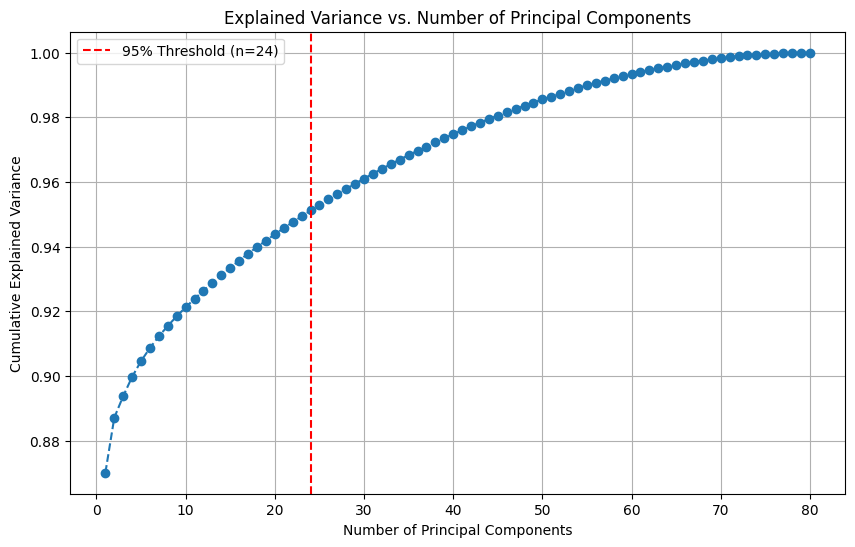

In [ ]:
# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Plotting the explained variance with a horizontal line at 95%
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'95% Threshold (n={n_components_95})')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=n_components_95)
principal_components = pca.fit_transform(new_df)
principal_components

array([[-10.84894184,   2.41709114,   0.17993108, ...,   0.79958046,
          0.33037414,  -0.10516847],
       [-10.19726035,   0.25034415,  -1.96890506, ...,   0.53875872,
          1.0700396 ,  -1.14516191],
       [-10.67583619,   2.82401026,   0.01306055, ...,   1.28465141,
         -0.18085851,   0.33226214],
       ...,
       [-10.78954245,   0.99130857,   2.62293995, ...,  -1.4224497 ,
         -1.04166587,   1.76072845],
       [-10.72345293,  -2.76267866,  -2.93144535, ...,  -0.28644584,
          0.57165676,   0.26595821],
       [-10.39819112,  -0.82039073,  -2.52029198, ...,  -1.17732014,
         -0.08359714,   0.58041874]])

In [ ]:
# Establish Dataframe based on PCA
principal_components_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components_95 + 1)])

principal_components_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,-10.848942,2.417091,0.179931,-1.568657,1.687105,-0.297178,1.359221,-0.245960,-0.605338,-0.382684,...,0.497950,0.509842,-0.651198,0.504873,-1.178551,0.457759,0.055075,0.799580,0.330374,-0.105168
1,-10.197260,0.250344,-1.968905,1.430473,0.586681,-1.035400,0.282239,-0.240861,-0.946383,-0.332859,...,-0.042179,-0.563936,2.691760,-0.018990,-0.556545,0.743493,1.010032,0.538759,1.070040,-1.145162
2,-10.675836,2.824010,0.013061,-1.230075,1.564402,-0.553592,1.524082,-0.918907,-0.308534,0.237299,...,-0.100482,0.210049,-0.005430,0.135804,0.250185,-0.417137,0.475598,1.284651,-0.180859,0.332262
3,-11.040308,-1.333391,1.275499,1.140091,0.058489,-0.181231,1.426527,0.233771,0.433860,-0.109049,...,0.460655,-1.099233,1.297547,-0.027841,-0.737902,1.113699,1.882388,1.262490,-1.884722,-0.695288
4,-9.992595,4.993262,1.232555,0.375197,1.774548,-0.547716,1.000130,-1.322752,-0.395670,-0.160403,...,-0.012294,-0.265083,1.066890,-0.980978,0.555565,-0.564429,0.593367,0.755061,-0.358765,-0.415638


In [ ]:
# Split Data based on PCA
X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(principal_components_df,y,
                                                test_size = 0.25, #75% train : 25% test
                                                random_state = 42)

## **6.1 Regression without PCA**

In [ ]:
new_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
new_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730865,0.073375,-0.045532,-0.208034,-0.207142,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-1.728492,-0.872563,-0.045532,0.409895,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,-1.726120,0.073375,-0.045532,-0.084449,0.073480,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502
3,-1.723747,0.309859,-0.045532,-0.414011,-0.096897,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,-1.721374,0.073375,-0.045532,0.574676,0.375148,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,2.100892,0.138777,0.313867,0.208502
5,-1.719002,-0.163109,-0.045532,0.615871,0.360616,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,-1.390058,5.190736,1.323736,1.360892,0.891994,0.313867,0.208502
6,-1.716629,-0.872563,-0.045532,0.203918,-0.043379,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.620891,-0.614439,0.313867,0.208502
7,-1.714256,0.073375,-0.045532,60.000000,-0.013513,0.064238,0.024699,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,5.190736,0.618024,1.730892,0.891994,0.313867,0.208502
8,-1.711883,-0.163109,1.537245,-0.784768,-0.440659,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.859110,0.138777,0.313867,-3.426284
9,-1.709511,3.147673,-0.045532,-0.825963,-0.310370,0.064238,0.024699,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.969111,0.138777,0.313867,0.208502


In [ ]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [ ]:
# Data train is original without PCA
X = new_df

#Splitting
X_train, X_test,Y_train,Y_test = train_test_split(X,y,
                                                test_size = 0.25,
                                                random_state = 42)

In [ ]:
# Establish LinearRegression Model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predict Y using LinearRegression with input X_test
# Predict Y using LinearRegression with input X_train
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# Establish LinearRegression Model with input based on previous PCA

from sklearn.linear_model import LinearRegression
model_pca = LinearRegression()
model_pca.fit(X_train_pca, Y_train_pca)

LinearRegression()

In [ ]:
# Predict Y using LinearRegression with input X_test_pca
# Predict Y using LinearRegression with input X_train_pca
y_pred_pca = model_pca.predict(X_test_pca)
y_pred_train_pca = model_pca.predict(X_train_pca)

### **7. Model Evaluation**

In [ ]:
# RMSE : The lower the value of RMSE the better the performance of the Model
# RMSE : How close is the result of prediction between train and test data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Data test (Unseen) RMSE DENGAN PCA : {}'.format(np.sqrt(mean_squared_error(Y_test_pca, y_pred_pca))))
print('Data test (Unseen) RMSE TANPA PCA : {}'.format(np.sqrt(mean_squared_error(Y_test, y_pred))))

Data test (Unseen) RMSE DENGAN PCA : 32349.85882609409
Data test (Unseen) RMSE TANPA PCA : 33015.694773355455


In [ ]:
from sklearn.metrics import r2_score
# R2 : The higher the score the better the performance (1-100 %)
# R2 : The higher the score the more linear the model is
print('Data test (Unseen) R-Square DENGAN PCA : {}'.format((r2_score(Y_test_pca, y_pred_pca))*100))
print('Data test (Unseen) R-Square TANPA PCA : {}'.format((r2_score(Y_test, y_pred))*100))



Data test (Unseen) R-Square DENGAN PCA : 85.06113922670193
Data test (Unseen) R-Square TANPA PCA : 84.43985706807084


## **# Findings:**
In this case of dataset

1.   **LinearRegression based on PCA datasets have better performance compared to the one without PCA.**
2.   **However, the performance is not significantly better between both PCA and non-PCA.**

